URLDATA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
urldata = pd.read_csv("urldata.csv")

In [3]:
urldata.head()

,Unnamed: 0,url,label,result
0,0,https://www.google.com,benign,0
1,1,https://www.youtube.com,benign,0
2,2,https://www.facebook.com,benign,0
3,3,https://www.baidu.com,benign,0
4,4,https://www.wikipedia.org,benign,0


In [4]:
urldata = urldata.drop('Unnamed: 0',axis=1)

In [5]:
urldata.head()

,url,label,result
0,https://www.google.com,benign,0
1,https://www.youtube.com,benign,0
2,https://www.facebook.com,benign,0
3,https://www.baidu.com,benign,0
4,https://www.wikipedia.org,benign,0


In [6]:
urldata.shape

(450176, 3)

In [7]:
urldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450176 entries, 0 to 450175
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     450176 non-null  object
 1   label   450176 non-null  object
 2   result  450176 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 10.3+ MB


In [8]:
urldata.isnull().sum()

url       0
label     0
result    0
dtype: int64

In [9]:
!pip install tld

In [10]:
from urllib.parse import urlparse
from tld import get_tld
import os.path

In [11]:
#Length of URL
urldata['url_length'] = urldata['url'].apply(lambda i: len(str(i)))
urldata['hostname_length'] = urldata['url'].apply(lambda i: len(urlparse(i).netloc))
#Path Length
urldata['path_length'] = urldata['url'].apply(lambda i: len(urlparse(i).path))

In [12]:
#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

urldata['fd_length'] = urldata['url'].apply(lambda i: fd_length(i))

In [13]:
#Length of Top Level Domain
urldata['tld'] = urldata['url'].apply(lambda i: get_tld(i,fail_silently=True))
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

urldata['tld_length'] = urldata['tld'].apply(lambda i: tld_length(i))

In [14]:
urldata.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,tld,tld_length
0,https://www.google.com,benign,0,22,14,0,0,com,3
1,https://www.youtube.com,benign,0,23,15,0,0,com,3
2,https://www.facebook.com,benign,0,24,16,0,0,com,3
3,https://www.baidu.com,benign,0,21,13,0,0,com,3
4,https://www.wikipedia.org,benign,0,25,17,0,0,org,3


In [15]:
urldata = urldata.drop("tld",1)

In [16]:
urldata.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,tld_length
0,https://www.google.com,benign,0,22,14,0,0,3
1,https://www.youtube.com,benign,0,23,15,0,0,3
2,https://www.facebook.com,benign,0,24,16,0,0,3
3,https://www.baidu.com,benign,0,21,13,0,0,3
4,https://www.wikipedia.org,benign,0,25,17,0,0,3


In [17]:
urldata['count-'] = urldata['url'].apply(lambda i: i.count('-'))
urldata['count@'] = urldata['url'].apply(lambda i: i.count('@'))
urldata['count?'] = urldata['url'].apply(lambda i: i.count('?'))
urldata['count%'] = urldata['url'].apply(lambda i: i.count('%'))
urldata['count.'] = urldata['url'].apply(lambda i: i.count('.'))
urldata['count='] = urldata['url'].apply(lambda i: i.count('='))
urldata['count-http'] = urldata['url'].apply(lambda i : i.count('http'))
urldata['count-https'] = urldata['url'].apply(lambda i : i.count('https'))
urldata['count-www'] = urldata['url'].apply(lambda i: i.count('www'))

In [18]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
urldata['count-digits']= urldata['url'].apply(lambda i: digit_count(i))

In [19]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
urldata['count-letters']= urldata['url'].apply(lambda i: letter_count(i))

In [20]:
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
urldata['count_dir'] = urldata['url'].apply(lambda i: no_of_dir(i))

In [21]:
urldata.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,tld_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir
0,https://www.google.com,benign,0,22,14,0,0,3,0,0,0,0,2,0,1,1,1,0,17,0
1,https://www.youtube.com,benign,0,23,15,0,0,3,0,0,0,0,2,0,1,1,1,0,18,0
2,https://www.facebook.com,benign,0,24,16,0,0,3,0,0,0,0,2,0,1,1,1,0,19,0
3,https://www.baidu.com,benign,0,21,13,0,0,3,0,0,0,0,2,0,1,1,1,0,16,0
4,https://www.wikipedia.org,benign,0,25,17,0,0,3,0,0,0,0,2,0,1,1,1,0,20,0


In [22]:
import re

In [23]:
#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return -1
    else:
        # print 'No matching pattern found'
        return 1
urldata['use_of_ip'] = urldata['url'].apply(lambda i: having_ip_address(i))

In [24]:
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return -1
    else:
        return 1
urldata['short_url'] = urldata['url'].apply(lambda i: shortening_service(i))

In [25]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [153]:
#Predictor Variables
x = urldata[[ 'count-https','count-digits']]

#Target Variable
y = urldata['result']

In [172]:
#Splitting the data into Training and Testing
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.80, random_state=42)

In [173]:
x_train.shape

(360140, 2)

In [174]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
xgb_predictions = xgb.predict(x_test)

gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
gb_predictions = gb.predict(x_test)

dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
dt_predictions = dt_model.predict(x_test)

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc_predictions = rfc.predict(x_test)

log= LogisticRegression()
log.fit(x_train,y_train)
log_predictions = log.predict(x_test)

ada= AdaBoostClassifier()
ada.fit(x_train,y_train)
ada_predictions = ada.predict(x_test)

D:\compiler\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:03:55] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [180]:
from sklearn import metrics

ConMat = metrics.confusion_matrix(y_test,gb_predictions)
TN,FP,FN,TP = ConMat.ravel()
Accuracy = metrics.accuracy_score(y_test,gb_predictions)*100
Prec=TP/(TP+FN)
TPR=TP/(TP+FN)
FPR=FP/(TN+FP)
TNR=TN/(TN+FP)
FNR=FN/(FN+TP)
print("Confusion Matrix:\n",ConMat)
print('True Negative:', TN)
print('False Positive:', FP)
print('False Negative:', FN)
print('True Positive:', TP)
print('Accuracy: %.2f' %Accuracy)
print('Precision: %.2f' %Prec)
print('Recall/Sensitivity/True Positive Rate: %.2f' %TPR)
print('False Positive Rate: %.2f' %FPR)
print('Specificity/True Negative Rate: %.2f' %TNR)
print('False Negative Rate: %.2f' %FNR)

Confusion Matrix:
 [[68896    25]
 [ 1405 19710]]
True Negative: 68896
False Positive: 25
False Negative: 1405
True Positive: 19710
Accuracy: 98.41
Precision: 0.93
Recall/Sensitivity/True Positive Rate: 0.93
False Positive Rate: 0.00
Specificity/True Negative Rate: 1.00
False Negative Rate: 0.07


In [64]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(x_train,y_train).coef_
print(lasso_coef)

[-0.0013238  -0.0004669  -0.         -0.         -0.00093461  0.
  0.         -0.         -0.          0.          0.         -0.36184731
 -0.          0.00507718  0.          0.         -0.        ]


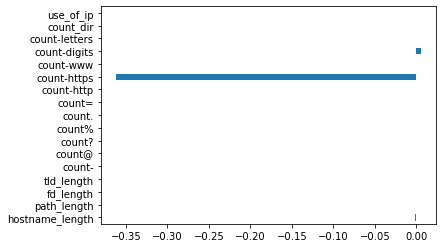

<Figure size 576x432 with 0 Axes>

In [65]:
feat_imp = pd.Series(lasso_coef, index=x.columns)
feat_imp.plot(kind='barh')

plt.figure(figsize=(8,6))
plt.show()

In [ ]:
print(rfc.feature_importances_)

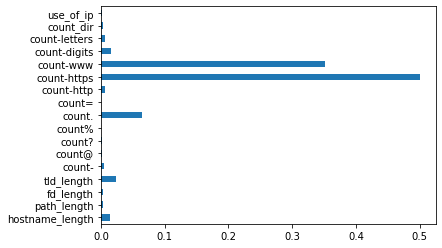

<Figure size 576x432 with 0 Axes>

In [66]:
feat_imp = pd.Series(rfc.feature_importances_, index=x.columns)
feat_imp.plot(kind='barh')

plt.figure(figsize=(8,6))
plt.show()

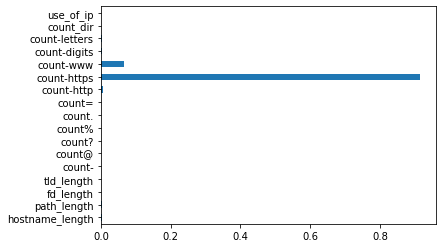

<Figure size 576x432 with 0 Axes>

In [67]:
feat_imp = pd.Series(dt_model.feature_importances_, index=x.columns)
feat_imp.plot(kind='barh')

plt.figure(figsize=(8,6))
plt.show()

In [68]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression)
selector.fit(x, y)

feature_scores = list(zip(x.columns, selector.scores_))


total_score = sum(selector.scores_)
for feature, score in feature_scores:
    percentage = (score / total_score) * 100
    print(f"{feature}: {percentage:.2f}%")


hostname_length: 0.06%
path_length: 0.00%
fd_length: 0.01%
tld_length: 0.01%
count-: 0.17%
count@: 0.11%
count?: 0.05%
count%: 0.01%
count.: 0.02%
count=: 0.07%
count-http: 0.13%
count-https: 70.67%
count-www: 28.07%
count-digits: 0.26%
count-letters: 0.02%
count_dir: 0.18%
use_of_ip: 0.17%
